In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib inline
%config InlineBackend.figure_format ='retina'
plt.style.use('fivethirtyeight')

### Load and Read Data 

In [3]:
#loading data collected from spotify api 
df = pd.read_csv('../data/top200-original.csv')

In [4]:
df.head(1)

,Position,Track Name,Artist,Streams,date,region,spotify_id
0,1.0,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,1867789.0,2019-01-01,us,3KkXRkHbMCARz0aVfEt68P


In [5]:
df.shape

(730000, 7)

In [6]:
df.region.value_counts()

se            73000
nl            73000
au            73000
br            73000
fr            73000
ca            73000
us            73000
de            73000
gb            73000
mx            72800
2019-04-13      200
Name: region, dtype: int64

In [7]:
# Look into data type 
df.dtypes

Position      float64
Track Name     object
Artist         object
Streams       float64
date           object
region         object
spotify_id     object
dtype: object

In [8]:
# Checking for missing data
df.isnull().sum()

Position      200
Track Name    243
Artist        243
Streams       200
date            0
region          0
spotify_id    201
dtype: int64

### Data Cleaning 

In [9]:
df.dropna(axis = 0, inplace = True) # dropping null values 

In [10]:
#converting position to a discrete value 
df['Position'] = df['Position'].apply(np.int64)

In [11]:
# renaming region column values 
df['region'] = df['region'].replace('au', 'Australia')
df['region'] = df['region'].replace('br', 'Brazil')
df['region'] = df['region'].replace('ca', 'Canada')
df['region'] = df['region'].replace('us', 'USA')
df['region'] = df['region'].replace('de', 'Germany')
df['region'] = df['region'].replace('fr', 'France')
df['region'] = df['region'].replace('mx', 'Mexico')
df['region'] = df['region'].replace('nl', 'Netherlands')
df['region'] = df['region'].replace('se', 'Sweden')
df['region'] = df['region'].replace('gb', 'UK')

In [12]:
# renaming columns name
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ','_')

In [13]:
# saving clean data into new csv file to be used for modeling 
df.to_csv('..//data/df.csv', index = False)

In [14]:
df.head()

,position,track_name,artist,streams,date,region,spotify_id
0,1,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,1867789.0,2019-01-01,USA,3KkXRkHbMCARz0aVfEt68P
1,2,Wow.,Post Malone,1564946.0,2019-01-01,USA,6MWtB6iiXyIwun0YzU6DFP
2,3,SICKO MODE,Travis Scott,1454622.0,2019-01-01,USA,2xLMifQCjDGFmkHkpNLD9h
3,4,"thank u, next",Ariana Grande,1397512.0,2019-01-01,USA,2rPE9A1vEgShuZxxzR2tZH
4,5,Going Bad (feat. Drake),Meek Mill,1245437.0,2019-01-01,USA,2IRZnDFmlqMuOrYOLnZZyc


In [15]:
# Change date column to be datetime dtype
df.set_index(pd.to_datetime(df['date']), inplace = True)

In [16]:
df.drop(columns =['date'], inplace = True)

In [17]:
df.sort_index(inplace = True)

In [18]:
df.reset_index
df.head()

,position,track_name,artist,streams,region,spotify_id
date,,,,,,
2019-01-01,1,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,1867789.0,USA,3KkXRkHbMCARz0aVfEt68P
2019-01-01,2,Wow.,Post Malone,1564946.0,USA,6MWtB6iiXyIwun0YzU6DFP
2019-01-01,3,SICKO MODE,Travis Scott,1454622.0,USA,2xLMifQCjDGFmkHkpNLD9h
2019-01-01,4,"thank u, next",Ariana Grande,1397512.0,USA,2rPE9A1vEgShuZxxzR2tZH
2019-01-01,5,Going Bad (feat. Drake),Meek Mill,1245437.0,USA,2IRZnDFmlqMuOrYOLnZZyc


### EDA 

In [19]:
# Total number of unique artists, songs and streams 
print('Total number of artists:', len(df['artist'].unique()))
print('Total number of songs:', len(df['track_name'].unique()))
print('Total number of Streams:', df['streams'].sum())

Total number of artists: 2574
Total number of songs: 8826
Total number of Streams: 88609758967.0


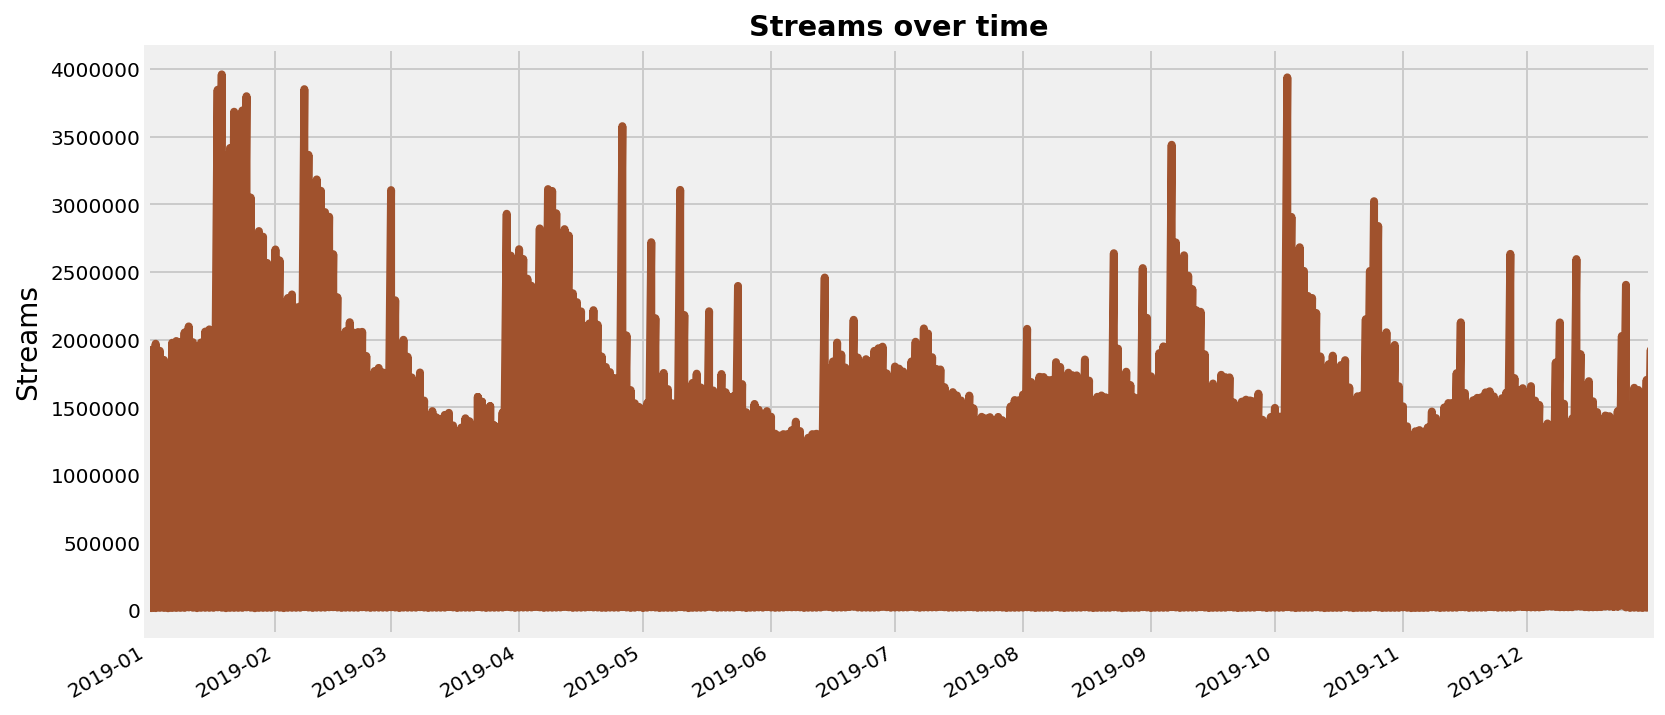

In [20]:
# Plotting Streaming trend overtime 
df['streams'].plot(figsize=(12, 6), 
                     color='sienna', zorder=2)
plt.title("Streams over time",fontweight="bold");               
plt.xlabel("", fontsize = 10)
plt.ylabel("Streams", fontsize = 14);
plt.savefig("../plots/streams_overtime.png", dpi = 100);

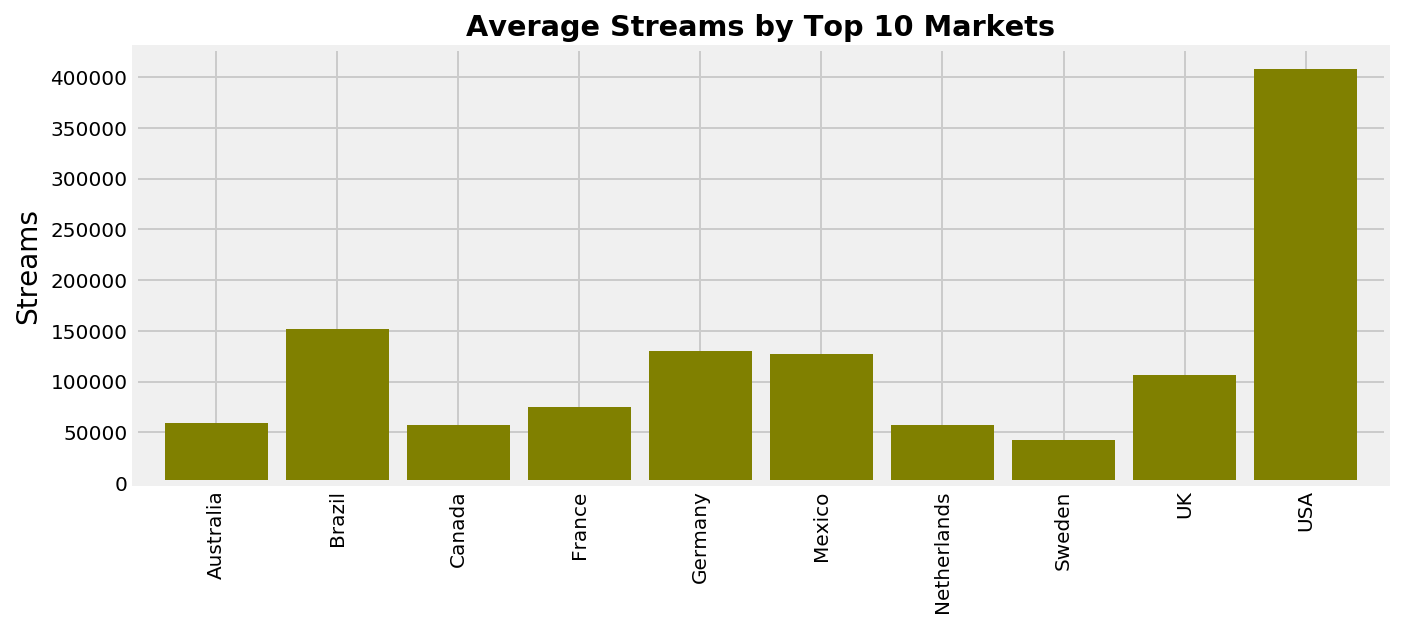

In [21]:
# plotting average stream 
avg_stream = df.groupby('region')['streams'].mean() # look into avg sterams by region
avg_stream.plot(kind = 'bar', figsize=(10, 4), 
                     color='olive', zorder=2, 
                    width=0.85)
plt.title("Average Streams by Top 10 Markets",fontweight="bold");               
plt.xlabel("", fontsize = 12)
plt.ylabel("Streams", fontsize = 14);
plt.savefig("../plots/avg_streams_bycountry.png", dpi = 100);

In [23]:
rank1_mask = df[df['position']== 1] # creating mask for rank1

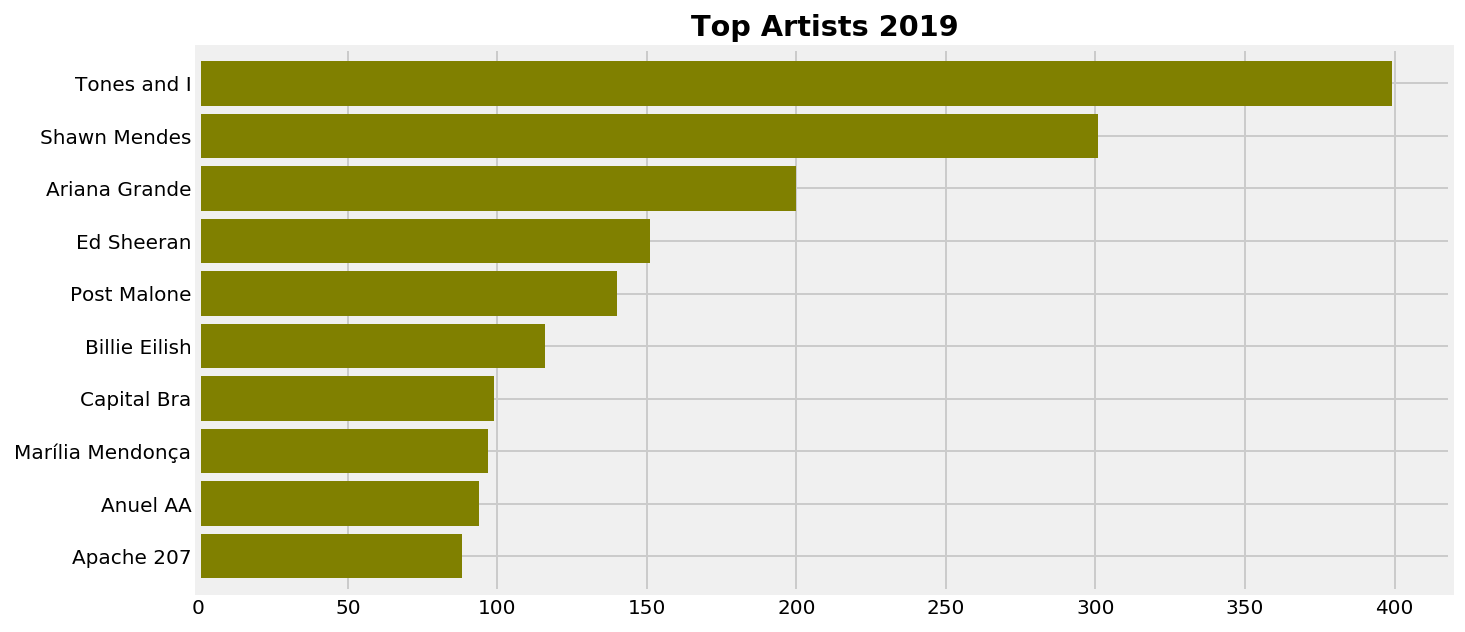

In [24]:
top_artists = rank1_mask['artist'].value_counts(ascending = False).head(10) # Look into rank1 artists 
ax = top_artists.plot(kind = 'barh', figsize=(10, 5), 
                     color='olive', zorder=2, 
                        width=0.85)
plt.title("Top Artists 2019", fontweight = 'bold')
ax.invert_yaxis();
plt.savefig("../plots/top_artists2019.png", dpi = 100);

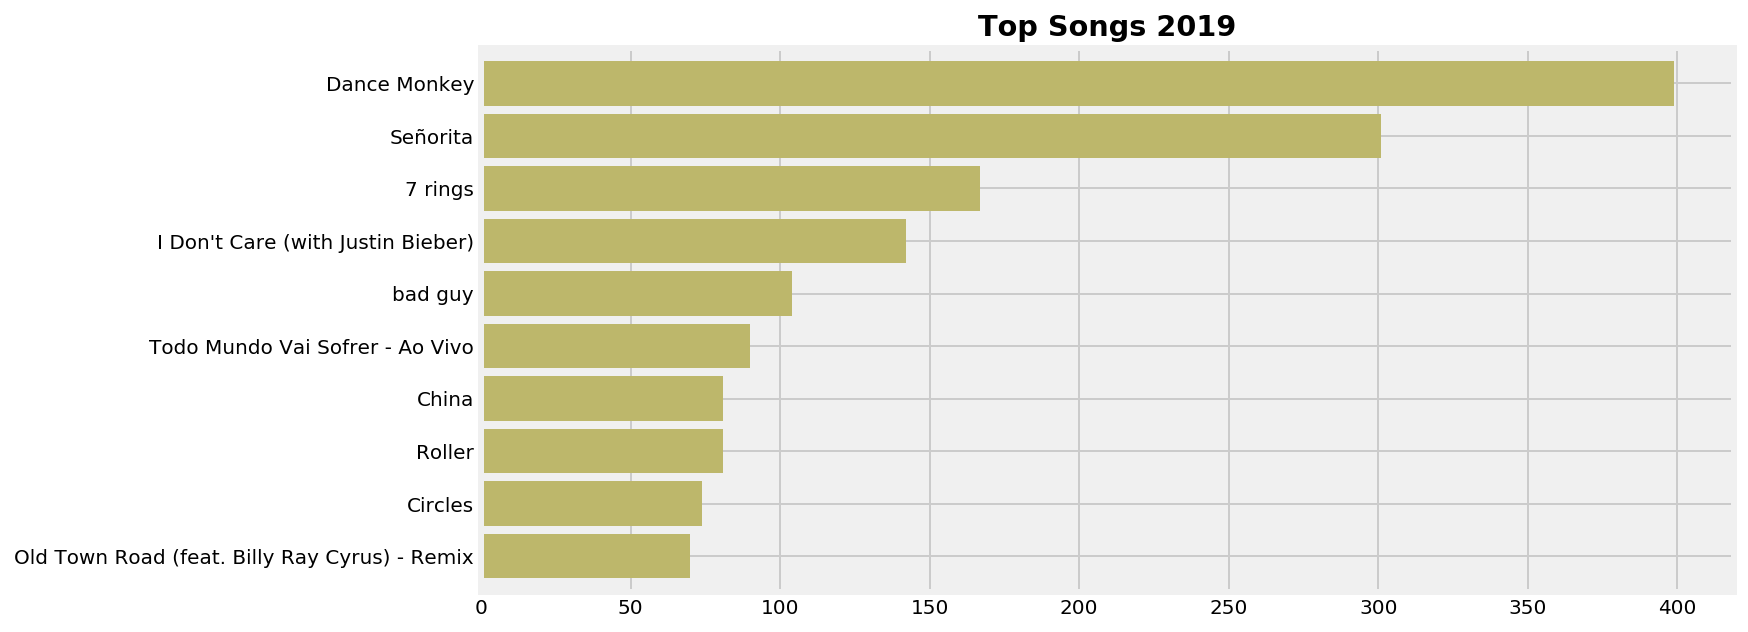

In [25]:
top_artists = rank1_mask['track_name'].value_counts(ascending = False).head(10) # Look into rank1 artists 
ax = top_artists.plot(kind = 'barh', figsize=(10, 5), 
                     color='darkkhaki', zorder=2, 
                        width=0.85)
plt.title("Top Songs 2019", fontweight = 'bold')
ax.invert_yaxis();
plt.savefig("../plots/top_songs2019.png", dpi = 100);

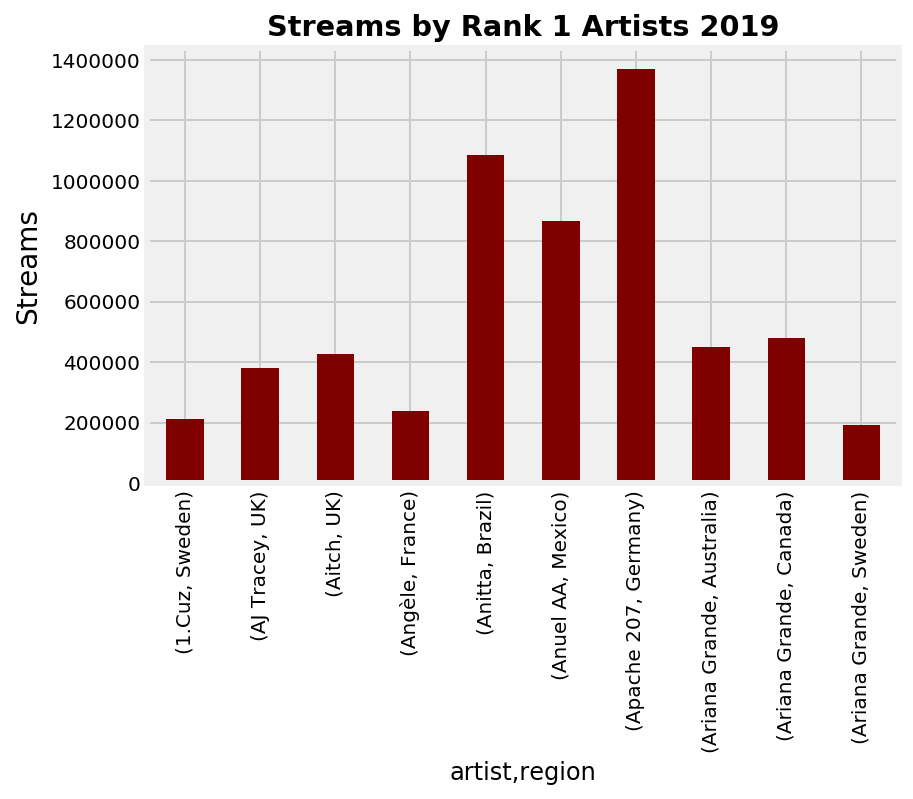

In [26]:
top_artists = rank1_mask.groupby(['artist', 'region'])["streams"].max(ascending = False).head(10)
ax = top_artists.plot(kind = 'bar', color = 'maroon');
plt.title("Streams by Rank 1 Artists 2019", fontweight = 'bold')
plt.ylabel("Streams", fontsize = 14);
plt.savefig("../plots/top_artists_byregion.png", dpi = 100);

In [27]:
# Grouping by unique songs to see number of streams overtime per song 
rank_one = rank1_mask.groupby(['track_name', 'date'])['streams'].unique()
rank_one = pd.DataFrame(rank_one)
rank_one

streams
track_name                   date                   
110                          2019-09-20  [1355298.0]
                             2019-09-21  [1295996.0]
                             2019-09-22  [1186433.0]
                             2019-09-23  [1408165.0]
                             2019-09-24  [1351001.0]
...                                              ...
quando a bad bater - ao vivo 2019-10-06   [529036.0]
                             2019-10-07   [477551.0]
                             2019-10-08   [494528.0]
                             2019-10-09   [504357.0]
                             2019-10-14   [485431.0]

[2714 rows x 1 columns]

In [28]:
#digging into top 5 position streams
df.groupby("position")["streams"].describe().head(5)

,count,mean,std,min,25%,50%,75%,max
position,,,,,,,,
1,3649.0,613648.151822,517686.754903,107539.0,289777.0,458729.0,701178.0,3961641.0
2,3649.0,502468.206632,421403.061473,89449.0,237483.0,372448.0,571211.0,3498779.0
3,3649.0,447964.681283,365313.627302,77692.0,213271.0,331970.0,515106.0,3198197.0
4,3649.0,413113.820499,335096.720605,66542.0,193691.0,306571.0,485584.0,3027413.0
5,3649.0,385558.454919,313762.766921,65000.0,179874.0,291814.0,454244.0,2796808.0


In [31]:
def plot_series(df, cols=None, title='Title', xlab=None, ylab=None, steps=1):
    plt.figure(figsize=(18,9))
    for col in cols:
        plt.plot(df[col])
    
    plt.title(title, fontsize=26)
    plt.xlabel(xlab, fontsize=20)
    plt.ylabel(ylab, fontsize=20)
    plt.yticks(fontsize=18)
    plt.xticks(df.index[0::steps], fontsize=18);

In [32]:
data = df[['streams', 'position']]
km = KMeans(n_clusters=10)
km.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

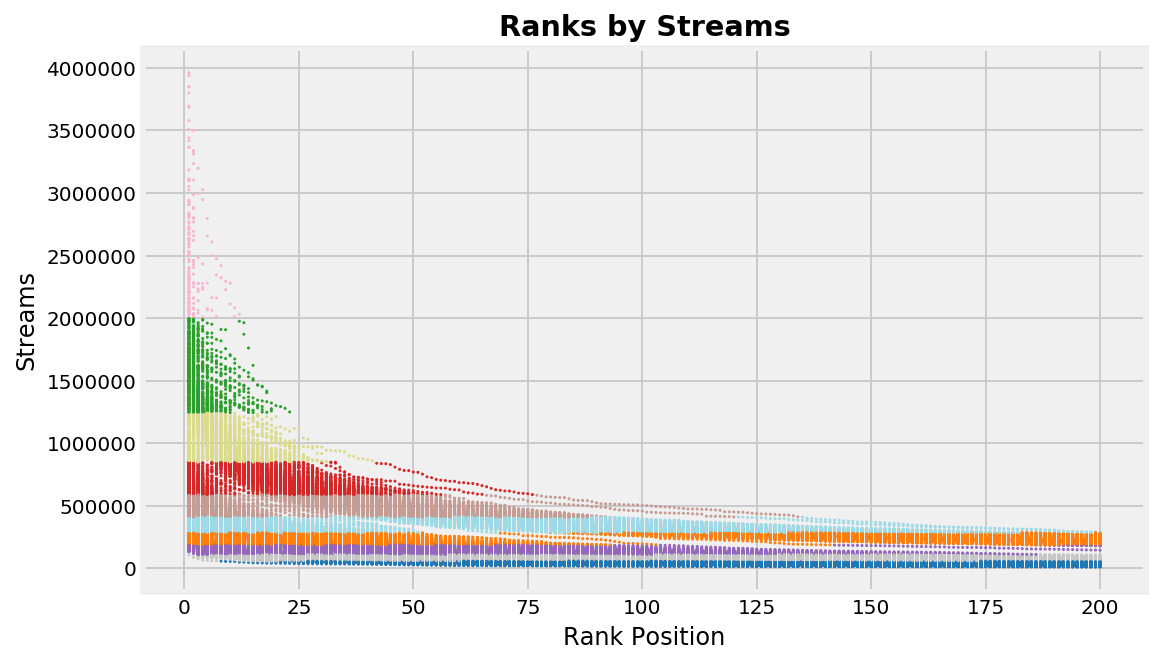

In [33]:
plt.figure(figsize=(8,5))
plt.scatter(df.position, df.streams, c=km.labels_, s=1, cmap="tab20");
plt.xlabel("Rank Position", fontsize = 12)
plt.ylabel("Streams", fontsize = 12);
plt.title('Ranks by Streams', fontweight = 'bold')
plt.savefig("../plots/ranksby_streams.png", dpi = 150);

In [ ]:
#germany_df.pivot(index='date', columns='Position', values='Streams')